<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01273286/blob/main/Data_Analysis_Modulo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Luis Alfonso Sabanero Esquivel A01273286
##Modulo 4 

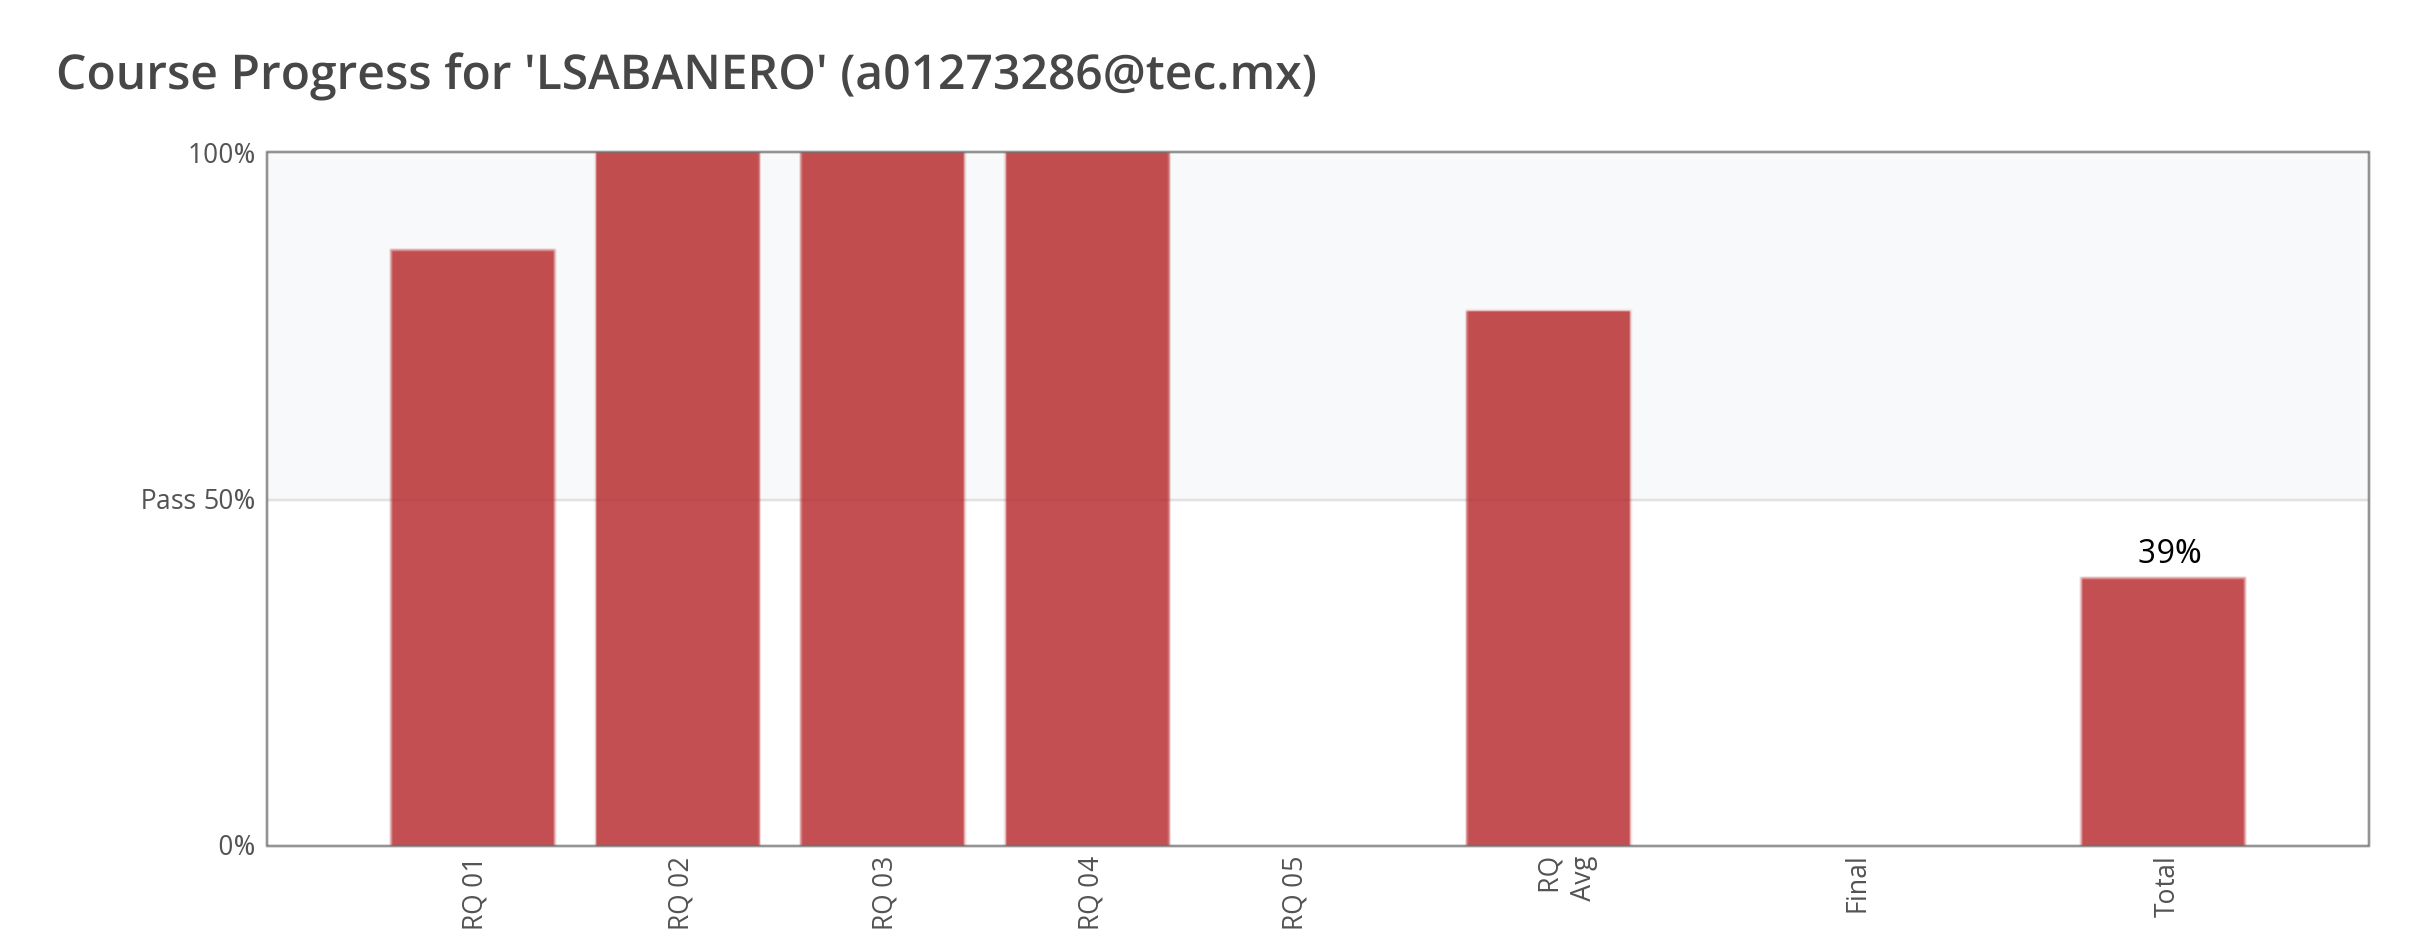

##LAB 1

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


La regresión lineal simple es un método que nos ayuda a comprender la relación entre dos variables:

* El predictor/variable independiente (X)
* La respuesta/variable dependiente (que queremos predecir)(Y)

In [4]:
#Paso 1 crear el objeto
lm = LinearRegression()
lm

LinearRegression()

In [5]:
#Paso 2 seleccionar variables de entrada y salida
X = df[['highway-mpg']] #Entrada variable independiente
Y = df['price'] #Variable dependiente

In [6]:
#Paso 3 ajustar modelo con la variable
lm.fit(X,Y)

LinearRegression()

In [7]:
#Paso 4 Predecir 
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

Ejemplo de otra regresion

In [8]:
lm.intercept_
#Intercepcion a

38423.3058581574

In [9]:
lm.coef_
#Slope b

array([-821.73337832])

In [11]:
lm1 = LinearRegression()
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [12]:
lm1.coef_

array([[166.86001569]])

In [13]:
lm1.intercept_

array([-7963.33890628])

In [14]:
#Comprobacion
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

#Regresion lineal multiple
Para predecir una respuesta con más de una variable

misma logica que la regresion simple

In [15]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [16]:
lm2.coef_

array([   1.49789586, -820.45434016])

Visualización

(0.0, 48184.85066218386)

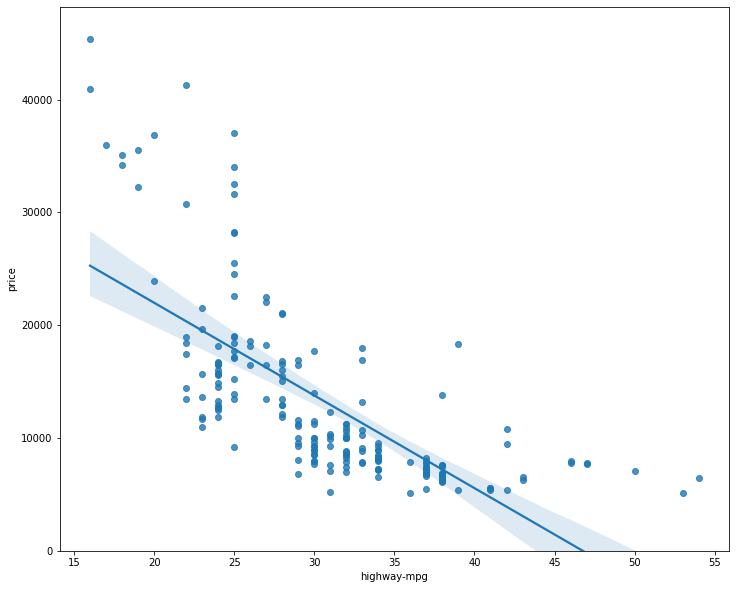

In [18]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

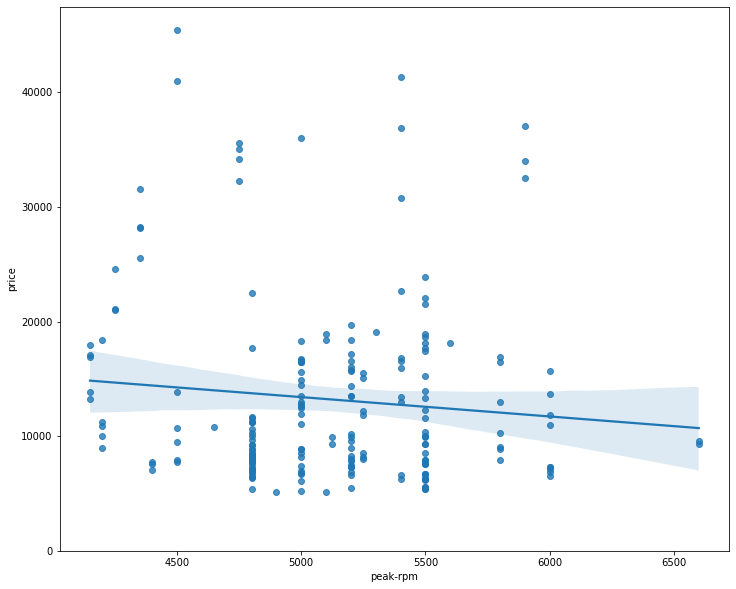

In [19]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [20]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


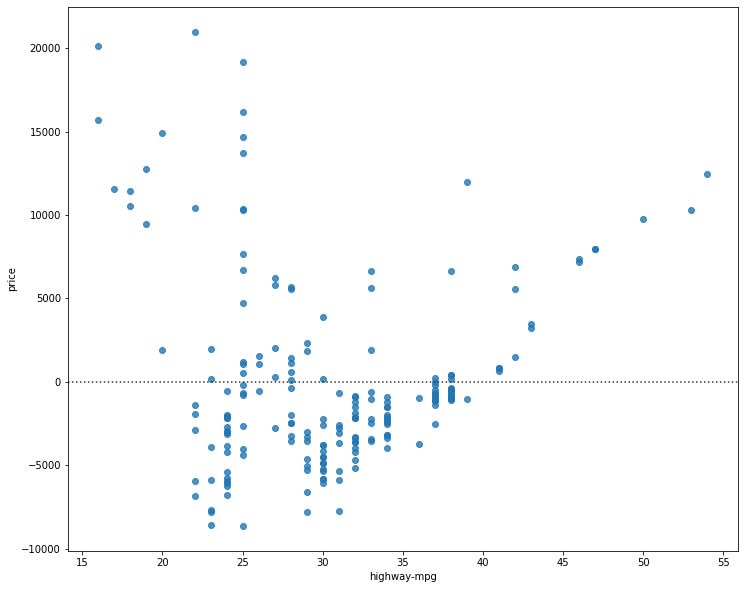

In [21]:
#Ver los residuos
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

#Regresion Polinomial

Se usa la funcion polifit, nota las relaciones en estas funciones son siempre lineares

In [25]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


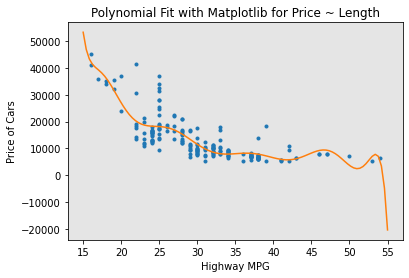

In [26]:
x = df['highway-mpg']
y = df['price']
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

##Pipeline

Se usa para poder trabajar con la transportación en pasos sin tener que hacer mucho codigo, se combina con modelos y puede tener N cantidad de pasos

In [28]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [29]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

##Metricas para evaluar

In [30]:
#Uso de la R2 para medir el desempeño
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The R-square is:  0.4965911884339176
The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [32]:
#Mse Eerro cuadradico medio, entre mas grande peor modelo
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [33]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)
lm.fit(X, Y)
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

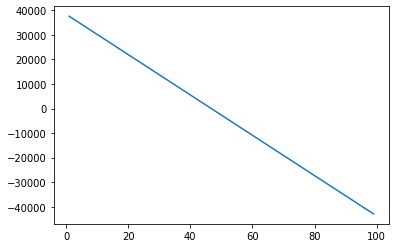

In [34]:
plt.plot(new_input, yhat)
plt.show()

#Preguntas

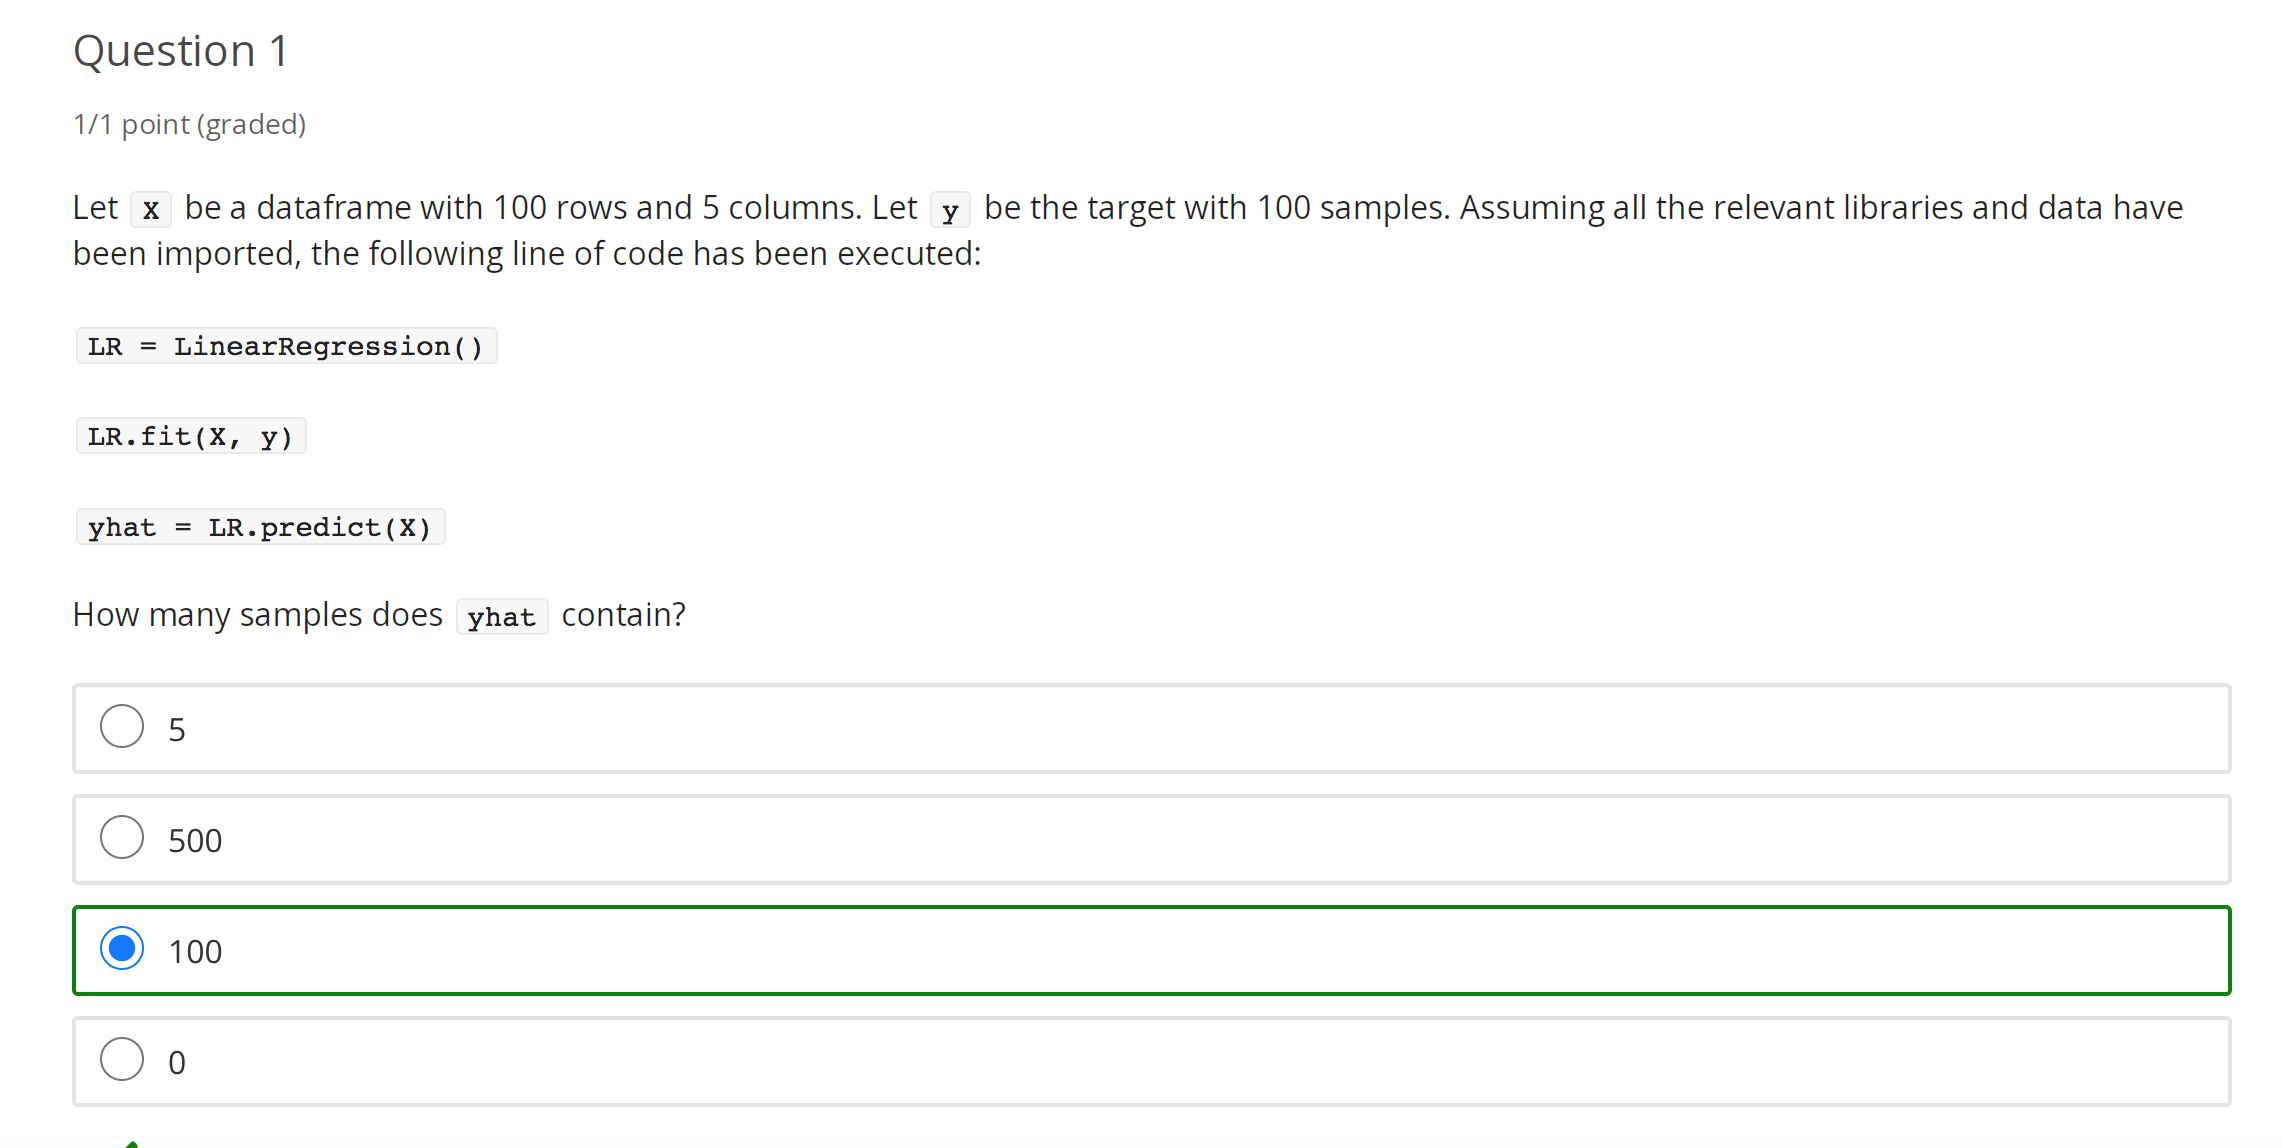

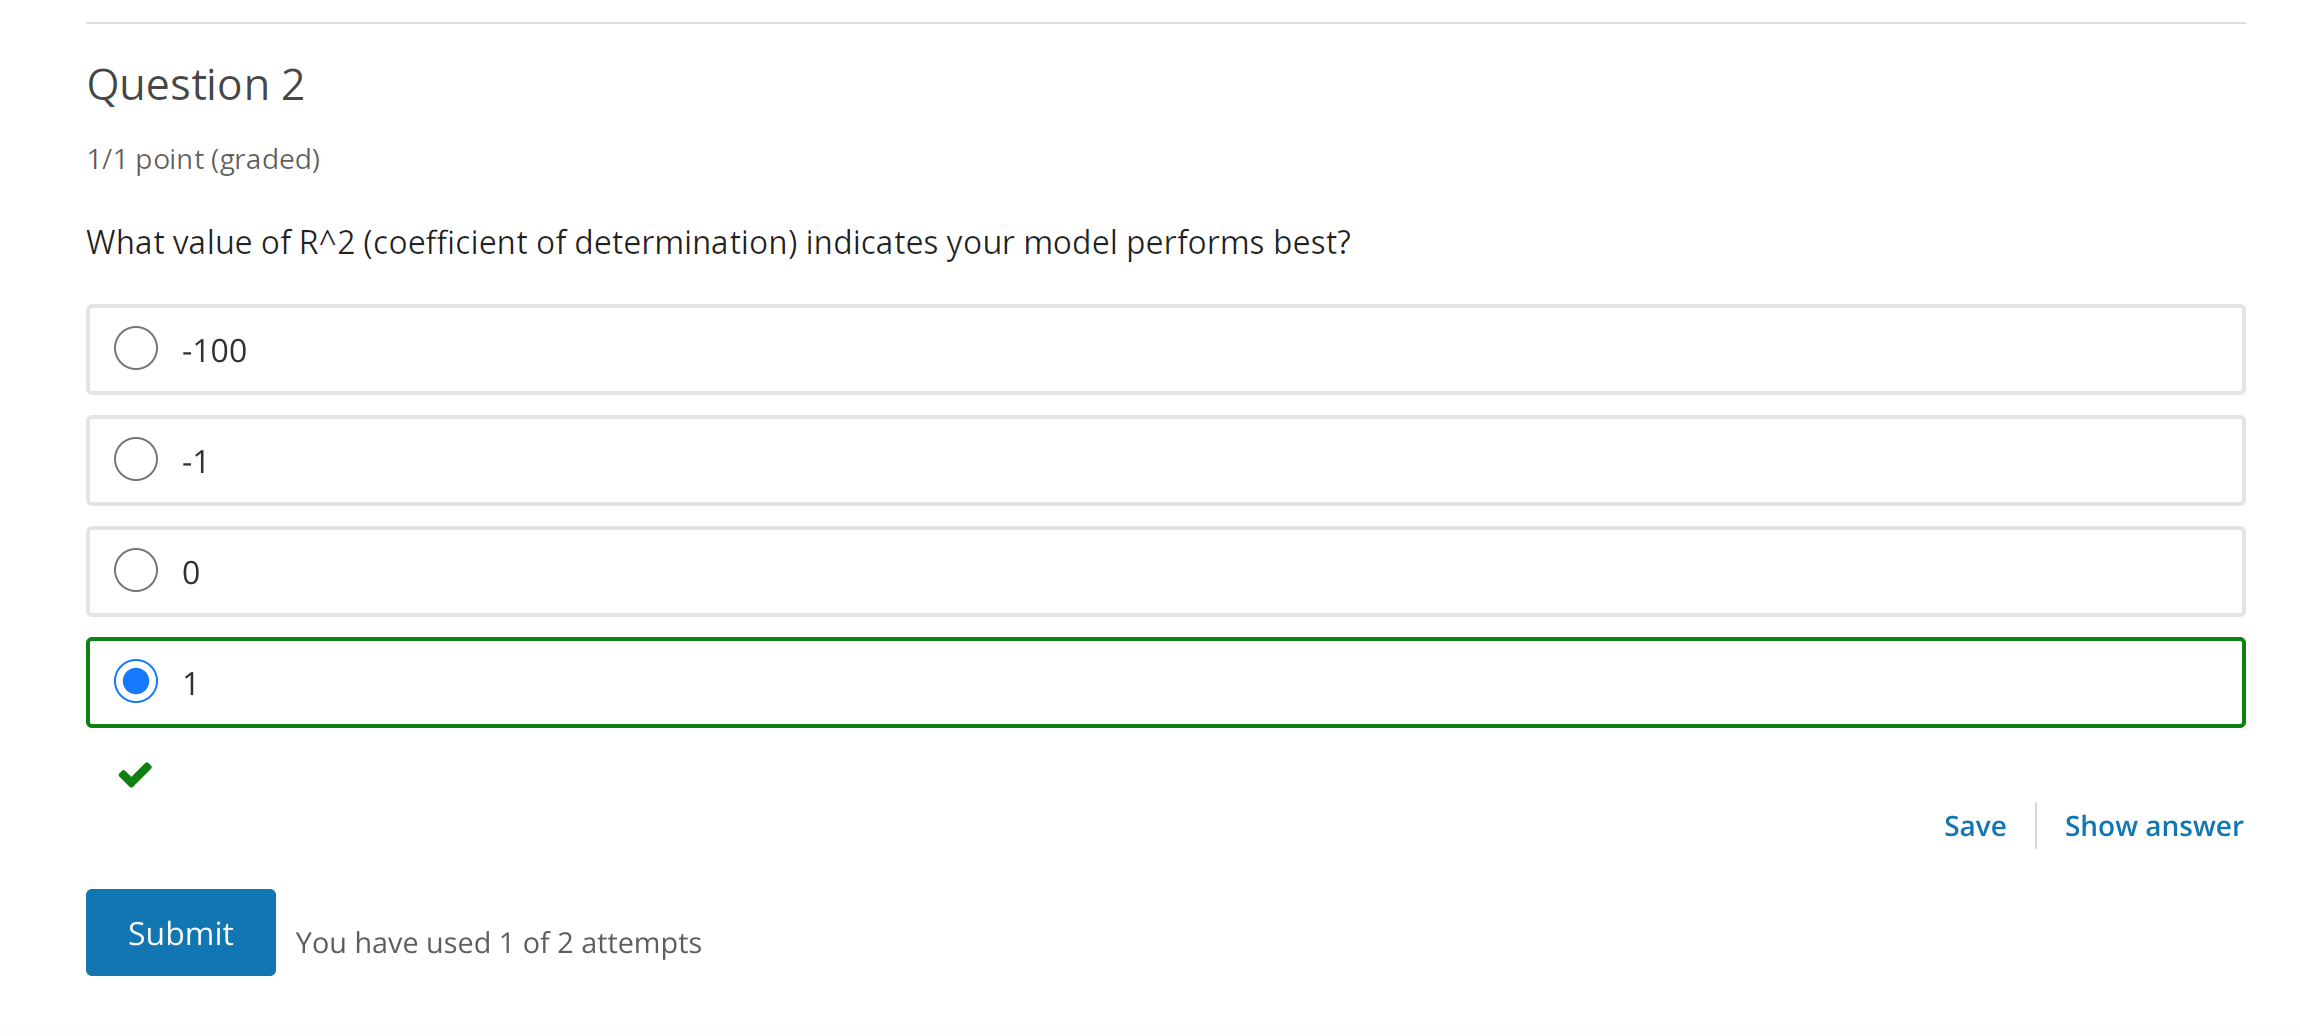

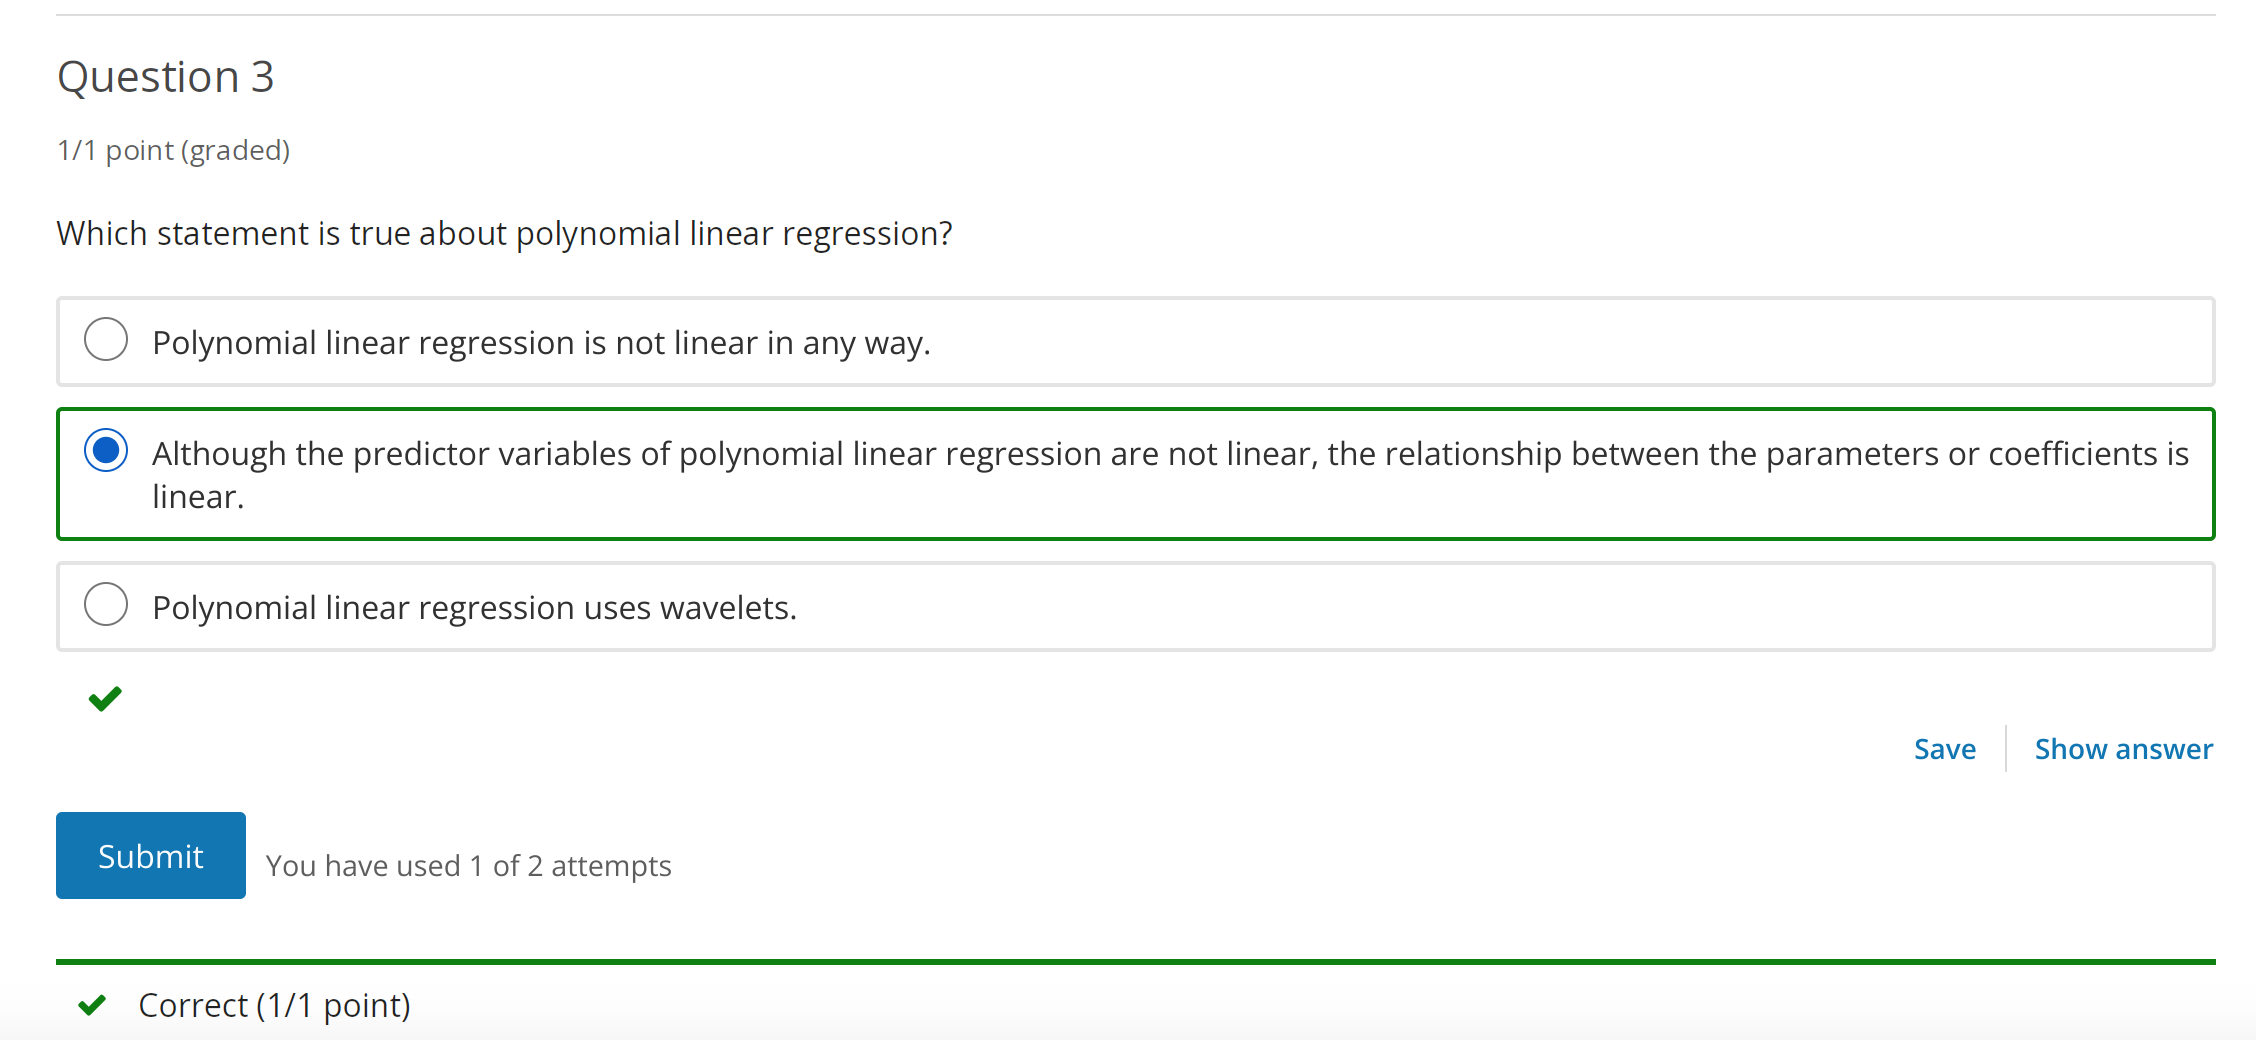

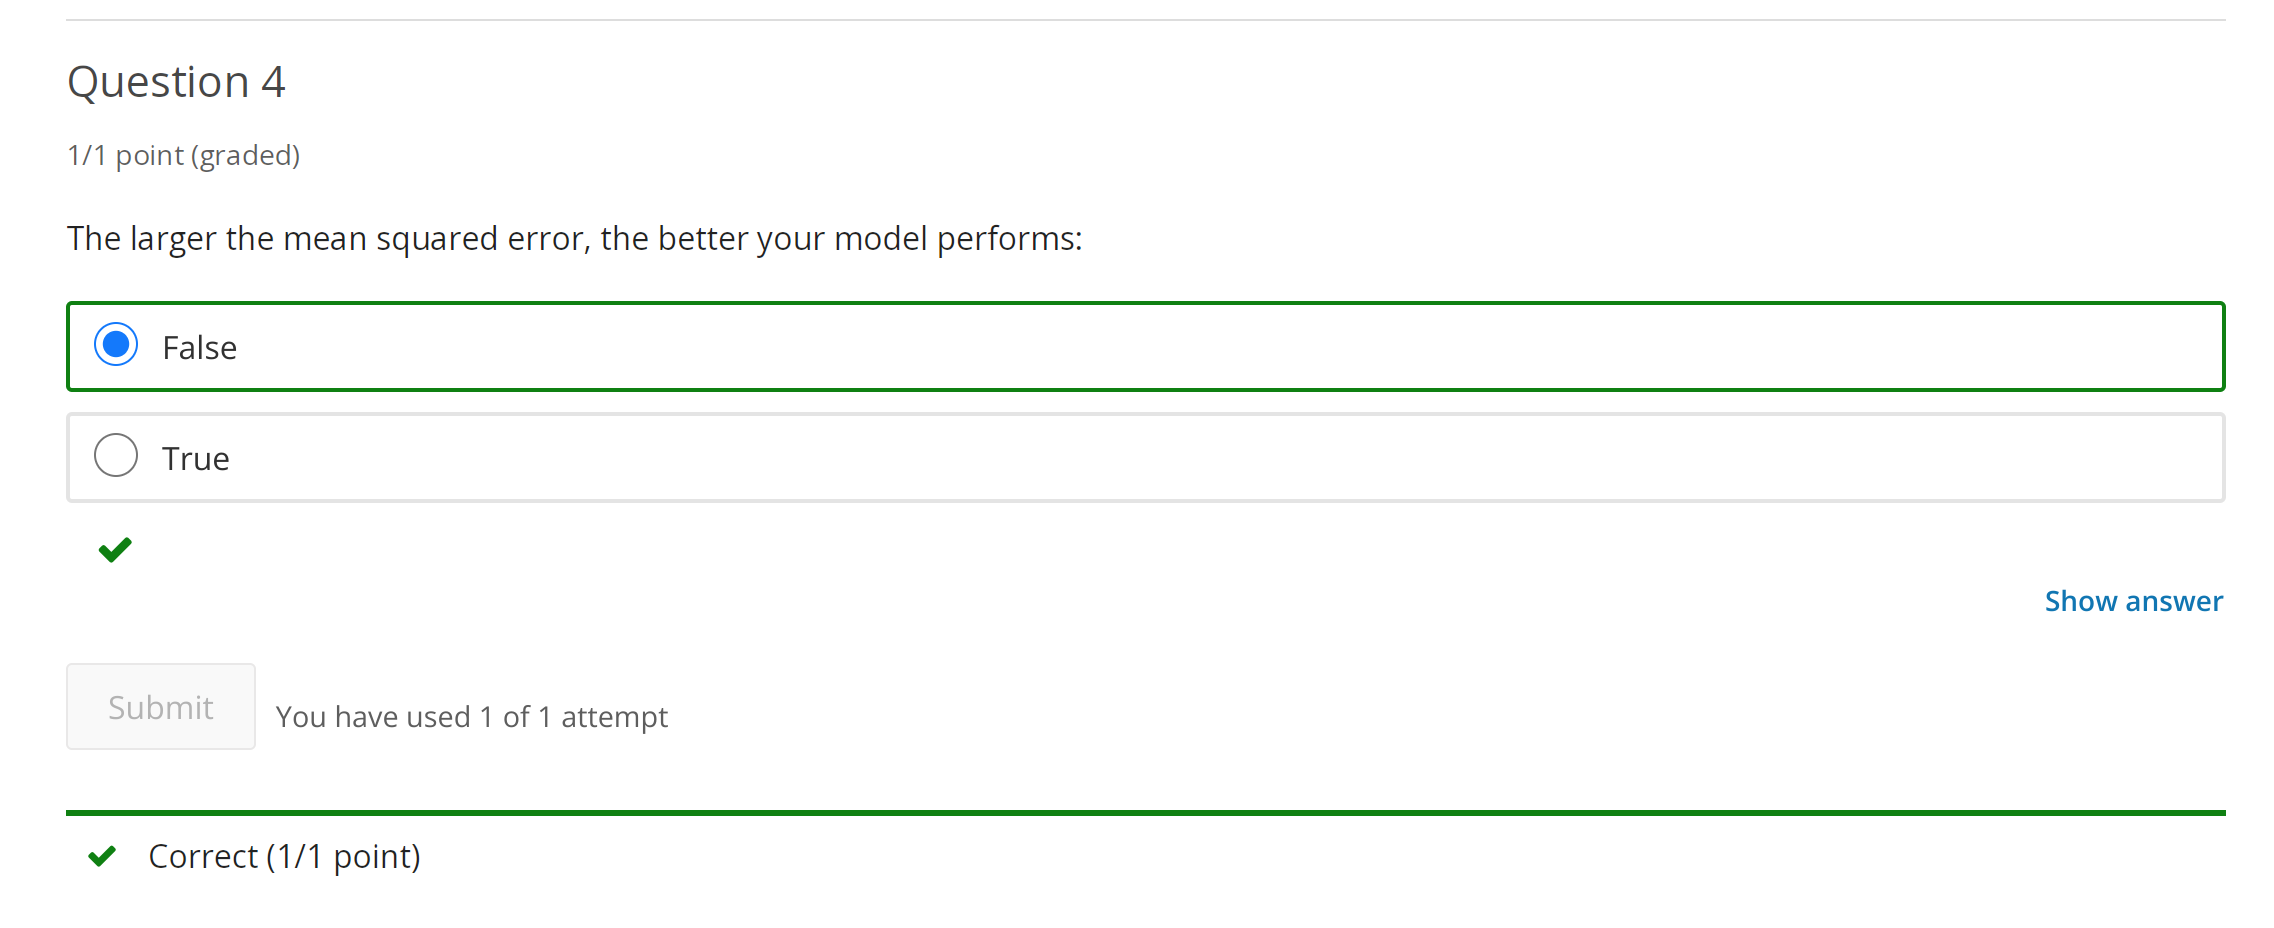

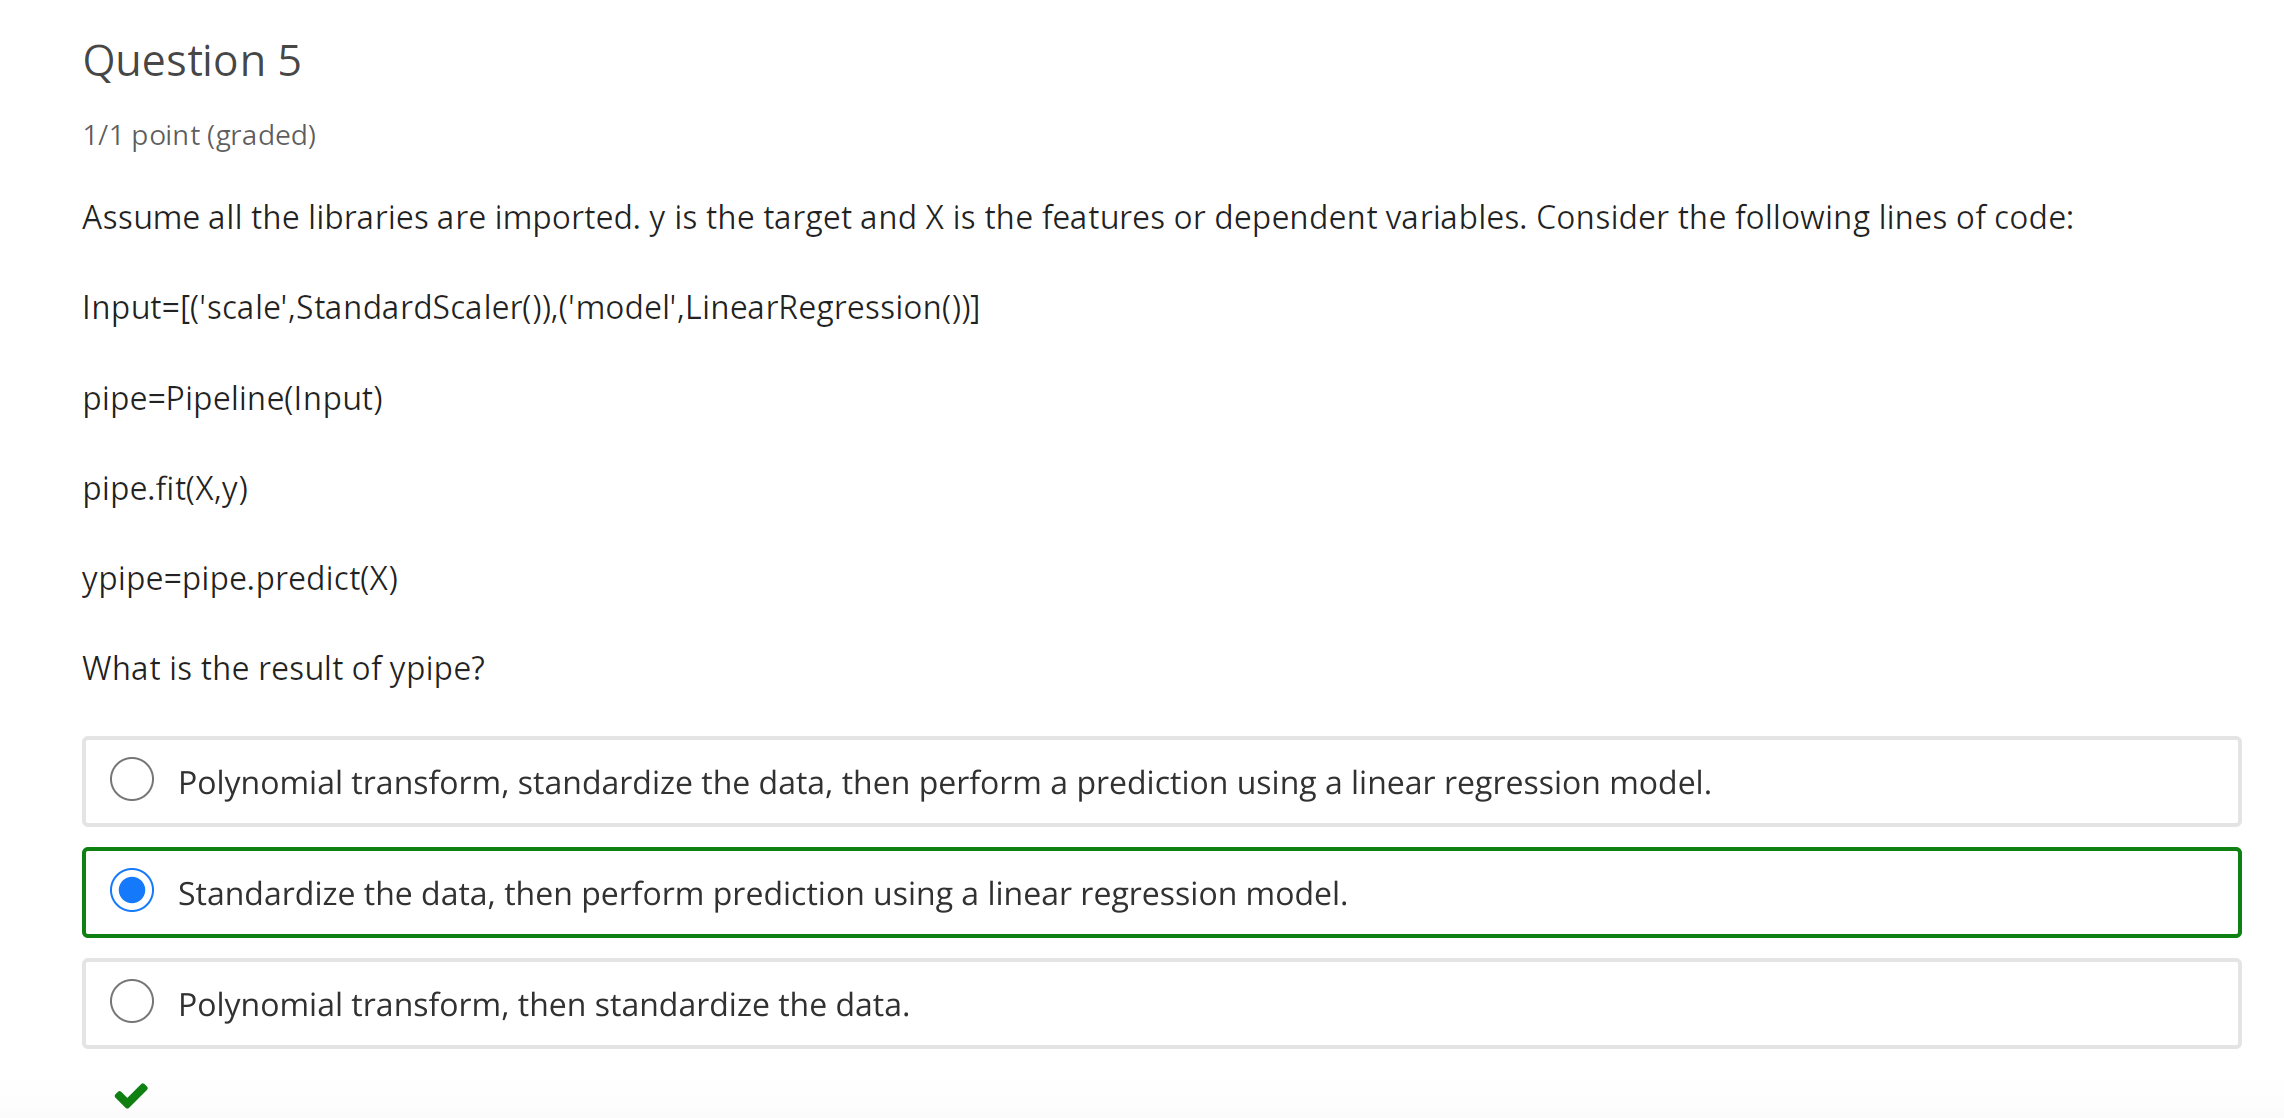